## Numerical solution to the SEIR Model

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate

In [11]:
# Tranmission Rate
beta = 1.15

# Recovery Rate
gamma = 0.36

# Incoming S individuals
alpha = 0.01

# Infectous to infected rate
epsilon = 1.6

# Natural death rate (same for all cases)
mu = 0.01


# Initial values... for S, E, I, R
Y_0 = [0.99, 0.01, 0.00, 0.00]

# The time values to solve the equations over
TimeStart = 0
TimeEnd   = 50
Times     = np.linspace (TimeStart, TimeEnd, 200)

# function used to compute the current state of the ODEs
def dYdt (t, Y):
    return np.array ([ alpha - beta * Y[0] * Y[2] - mu * Y[0],\
                        beta * Y[0] * Y[2] - epsilon * Y[1] - mu * Y[1], \
                        epsilon * Y[1] - gamma * Y[2] - mu * Y[2], \
                        gamma * Y[2] - mu * Y[3] ])

# Initialize the results 
Y_Solution = np.zeros ([len(Times), len(Y_0)])
Y_Solution [0, :] = Y_0

# Create the an 'integrate.ode' instance that does the heavy work to
# solve the ODE system
ODESolver = integrate.ode (dYdt)
ODESolver.set_initial_value (Y_0, TimeStart)

# Finally solve the ODE system.  Note that we are doing this in a loop
# so we can catch any errors
for i in range (1, len(Times)):
    Y_Solution [i, :] = ODESolver.integrate (Times[i])
    
    if not ODESolver.successful ():
        print (f'Could not integrate at point: {i}')


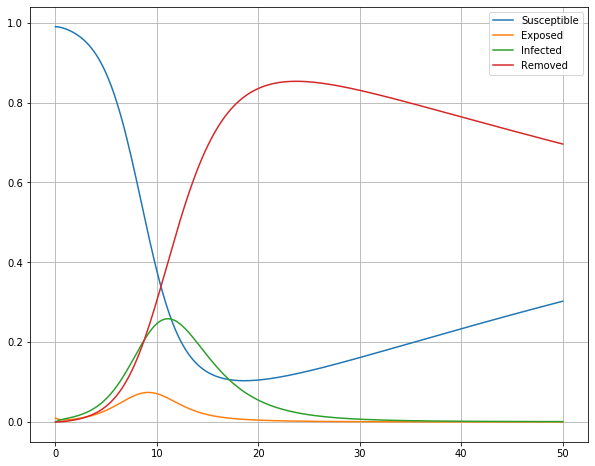

In [12]:
# plot the results...        
plt.figure (figsize=(10,8))
plt.plot (Times, Y_Solution)
plt.legend (['Susceptible', 'Exposed', 'Infected', 'Removed'])
plt.grid (True)
plt.show ()